In [1]:
# 定义函数get_factor.给定分钟数据，返回形如'SecuCode''TradeDay'因子值三列的结果数据
# 取自 20017_1.py
import pandas as pd
import numpy as np

def get_factor(df):
    ################################################# 替换！
    # 计算最短路径（Shortcut）
    df['Shortcut'] = 2 * (df['HighPrice'] - df['LowPrice']) - abs(df['ClosePrice'] - df['OpenPrice'])
    
    # 计算每分钟的最短路径与成交额的比值
    df['Shortcut_Value_Ratio'] = df['Shortcut'] / df['Amount']
    
    # 按照股票代码和交易日期分组，计算非流动性因子（ILLIQ）
    df_illiq = df.groupby(['SecuCode', 'TradeDay'])['Shortcut_Value_Ratio'].mean().reset_index()
    
    # 重命名列
    df_illiq.rename(columns={'Shortcut_Value_Ratio': 'ILLIQ'}, inplace=True)
    ################################################# 替换！
    
    ################################################# 替换！
    return df_illiq
    ################################################# 替换！

In [2]:
# 导入所有one_minute文件，生成相对应factor_result文件，并保存（每个文件对应某年某月）

import pandas as pd
import os

def generate_factor_files(input_directory, output_directory, process_function, start_year, start_month, end_year, end_month):
    # 生成所有的文件名，按年月顺序
    input_file_names = []

    # 生成文件名列表，考虑到起始年月和结束年月的数据
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            if (year == start_year and month < start_month) or (year == end_year and month > end_month):
                continue
            file_name = f"{year}{str(month).zfill(2)}_oneminute.feather"
            input_file_names.append(file_name)

    # 创建输出目录（如果不存在）
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # 处理并保存数据
    for file in input_file_names:
        input_file_path = os.path.join(input_directory, file)
        if os.path.exists(input_file_path):  # 检查文件是否存在
            # 读取Feather文件
            df_oneminute = pd.read_feather(input_file_path)
            
            # 调用数据处理函数
            df_res = process_function(df_oneminute)
            
            # 定义输出文件名
            year_month = file[:6]  # 提取文件名前6个字符作为年月
            output_file_name = f"{year_month}_factor_result.feather"
            output_file_path = os.path.join(output_directory, output_file_name)
            
            # 保存处理后的DataFrame为Feather文件
            df_res.to_feather(output_file_path)
            
            print(f"Processed and saved {output_file_path}")
        else:
            print(f"File {file} does not exist.")

# 使用示例
input_directory = r'F:\QuantData\minute_data'

################################################# 替换！
output_directory = r'F:\QuantData\factor_result_allmonth\factor_17_illiq'
################################################# 替换！

# 起始年月和结束年月
start_year, start_month = 2015, 1
end_year, end_month = 2024, 7

# 先生成所有factor_result文件
generate_factor_files(input_directory, output_directory, get_factor, start_year, start_month, end_year, end_month)

Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201501_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201502_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201503_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201504_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201505_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201506_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201507_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201508_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201509_factor_result.feather
Processed and saved F:\QuantData\factor_result_allmonth\factor_17_illiq\201510_factor_resul

In [1]:
# 将df_Day数据把前面计算得到的factor_result数据整合进去

import pandas as pd
import numpy as np
import os

df_Day_allmonth = pd.read_feather('F:\\QuantData\\AShareEODPrices_allmonth.feather')

# 确保 TradeDay 列转换为日期时间格式
df_Day_allmonth['TradeDay'] = pd.to_datetime(df_Day_allmonth['TradeDay'])

################################################# 替换！
output_directory = r'F:\QuantData\factor_result_allmonth\factor_17_illiq'
################################################# 替换！

output_file_names = [f for f in os.listdir(output_directory) if f.endswith('_factor_result.feather')]

# 先合并所有factor_result文件，再与df_Day_allmonth合并
list_res = []
for file in output_file_names:
    output_file_path = os.path.join(output_directory, file)
    
    # 读取Feather文件
    df_res = pd.read_feather(output_file_path)
    list_res.append(df_res)

df_factor_allmonth = pd.concat(list_res)

# 确保 TradeDay 列转换为日期时间格式
df_factor_allmonth['TradeDay'] = pd.to_datetime(df_factor_allmonth['TradeDay'])

# 与df_Day_allmonth合并
df_merge = pd.merge(df_factor_allmonth, df_Day_allmonth, on=['SecuCode', 'TradeDay'], how='left')



In [2]:
df_merge

,SecuCode,TradeDay,ILLIQ,SecuName,PreClosePrice,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,...,IfST,IfNonStandardAShareAuditOpinion,IfSuspend,FirstIndustryName,NegotiableMV,TotalMV,IfQ4LowCover,IfReportPeriodLate,IfTrade,IfTrade.Tag
0,000001.SZ,2015-01-05,3.766767e-09,平安银行,15.84,15.99,16.28,15.60,16.02,286043643.0,...,0.0,0.0,0.0,银行,1.575841e+11,1.830268e+11,0.0,0.0,0.0,",03"
1,000001.SZ,2015-01-06,5.351395e-09,平安银行,16.02,15.85,16.39,15.55,15.78,216642140.0,...,0.0,0.0,0.0,银行,1.552233e+11,1.802848e+11,0.0,0.0,0.0,",03"
2,000001.SZ,2015-01-07,5.980625e-09,平安银行,15.78,15.56,15.83,15.30,15.48,170012067.0,...,0.0,0.0,0.0,银行,1.522723e+11,1.768574e+11,0.0,0.0,0.0,",03"
3,000001.SZ,2015-01-08,8.088614e-09,平安银行,15.48,15.50,15.57,14.90,14.96,140771421.0,...,0.0,0.0,0.0,银行,1.471572e+11,1.709164e+11,0.0,0.0,0.0,",03"
4,000001.SZ,2015-01-09,5.688831e-09,平安银行,14.96,14.90,15.87,14.71,15.08,250850023.0,...,0.0,0.0,0.0,银行,1.483376e+11,1.722874e+11,0.0,0.0,0.0,",03"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918338,900957.SH,2024-07-19,4.049597e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8918339,900957.SH,2024-07-22,1.234647e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8918340,900957.SH,2024-07-23,2.861312e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8918341,900957.SH,2024-07-24,3.284412e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import statsmodels.api as sm
# 对每个交易日进行横截面市值中性化处理

def neutralize_by_mv(df, factor):
    df = df.copy()
    df['logMV'] = np.log(df['TotalMV'].replace(0, np.nan))  # 避免log(0)带来的问题
    neutralized_values = []

    for date, group in df.groupby('TradeDay'):
        group = group.dropna(subset=[factor, 'logMV']).copy()  # 确保 group 是一个副本
        if group.empty:
            continue
        y = group[factor]
        X = sm.add_constant(group['logMV'])
        if len(X) > 1:  # 确保有足够的数据点进行回归
            model = sm.OLS(y, X).fit()
            group[factor + '_neutralized'] = model.resid
        else:
            group[factor + '_neutralized'] = np.nan
        neutralized_values.append(group)

    return pd.concat(neutralized_values)
    
################################################# 替换！
# df_PT为回测前准备完成的数据
df_PT = neutralize_by_mv(df_merge, 'ILLIQ')
# 重命名中性化后的因子
df_PT.rename(columns={'ILLIQ_neutralized': 'FactorValue_neu'}, inplace=True)
################################################# 替换！


In [4]:
df_PT

,SecuCode,TradeDay,ILLIQ,SecuName,PreClosePrice,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,...,IfSuspend,FirstIndustryName,NegotiableMV,TotalMV,IfQ4LowCover,IfReportPeriodLate,IfTrade,IfTrade.Tag,logMV,FactorValue_neu
0,000001.SZ,2015-01-05,3.766767e-09,平安银行,15.84,15.99,16.28,15.60,16.02,286043643.0,...,0.0,银行,1.575841e+11,1.830268e+11,0.0,0.0,0.0,",03",25.932899,1.435155e-08
20,000002.SZ,2015-01-05,3.950210e-09,万科A,13.90,14.39,15.29,14.22,14.91,656083570.0,...,0.0,房地产,1.442082e+11,1.642341e+11,0.0,0.0,1.0,,25.824558,7.360312e-09
40,000004.SZ,2015-01-05,3.865970e-07,国华网安,15.57,15.58,15.90,15.30,15.69,2809512.0,...,0.0,医药生物,1.316006e+09,1.317594e+09,1.0,0.0,0.0,",06",20.999073,7.044577e-08
60,000006.SZ,2015-01-05,1.804925e-08,深振业A,7.05,7.10,7.39,7.02,7.08,107864712.0,...,0.0,房地产,9.479392e+09,9.557965e+09,1.0,0.0,0.0,",06",22.980641,-1.668753e-07
80,000007.SZ,2015-01-05,2.906111e-07,*ST全新,14.60,14.51,14.80,14.25,14.52,2841572.0,...,0.0,社会服务,2.988407e+09,3.353617e+09,1.0,0.0,0.0,",06",21.933305,3.632817e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8917441,688799.SH,2024-07-22,5.713606e-07,华纳药厂,41.69,41.41,42.06,41.17,41.62,334451.0,...,0.0,医药生物,3.903956e+09,3.903956e+09,0.0,0.0,1.0,,22.085256,2.293111e-07
8917461,688800.SH,2024-07-22,3.916298e-07,瑞可达,25.90,26.00,26.55,25.77,25.81,1690767.0,...,0.0,电子,4.088817e+09,4.088817e+09,0.0,0.0,1.0,,22.131522,5.370567e-08
8917481,688819.SH,2024-07-22,3.602748e-07,天能股份,22.15,22.00,22.55,21.99,22.20,1730837.0,...,0.0,电力设备,2.158062e+10,2.158062e+10,0.0,0.0,1.0,,23.795062,1.706861e-07
8917501,688981.SH,2024-07-22,1.960952e-08,中芯国际,51.20,50.90,51.45,50.65,50.98,30557978.0,...,0.0,电子,1.006146e+11,4.056137e+11,0.0,0.0,1.0,,26.728667,9.160588e-08


In [5]:
# 计算每支股票每天的收益率
df_PT['Return'] = df_PT['ClosePrice'] /  df_PT['PreClosePrice'] - 1

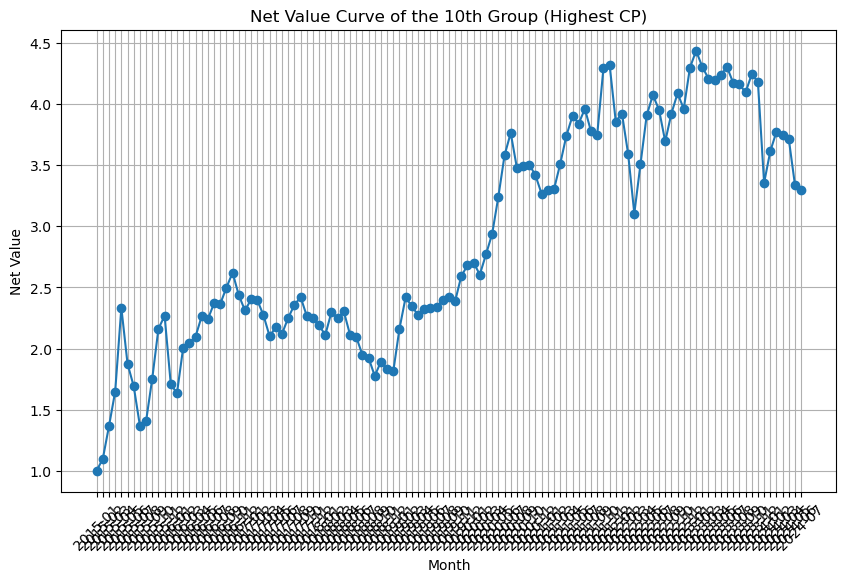

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建一个空的DataFrame用于保存每个月的净值
net_value = pd.DataFrame(columns=['Month', 'NetValue'])

# 初始化净值为1
initial_net_value = 1
net_value = pd.concat([net_value, pd.DataFrame({'Month': ['2015-01'], 'NetValue': [initial_net_value]})])

# 计算每个月的末日
df_PT['TradeDay'] = pd.to_datetime(df_PT['TradeDay'])
df_PT['Month'] = df_PT['TradeDay'].dt.to_period('M')
end_of_month = df_PT.groupby('Month')['TradeDay'].max().reset_index()

# 循环处理每个月的数据
for i in range(len(end_of_month) - 1):
    month_end_day = end_of_month.iloc[i]['TradeDay']
    next_month_end_day = end_of_month.iloc[i + 1]['TradeDay']

    # 获取该月最后一天的所有股票数据
    month_data = df_PT[df_PT['TradeDay'] == month_end_day].copy()
    
    # 对CP进行十分组
    month_data.loc[:, 'FactorValue_rank'] = pd.qcut(month_data['FactorValue_neu'], 10, labels=False) + 1

    # 选出第10组的股票
    group_10_stocks = month_data[month_data['FactorValue_rank'] == 10]['SecuCode'].values

    # 获取下个月这组股票的数据
    next_month_data = df_PT[(df_PT['TradeDay'] > month_end_day) & (df_PT['TradeDay'] <= next_month_end_day) & 
                            (df_PT['SecuCode'].isin(group_10_stocks))]

    # 计算每支股票的月收益率 (Return 取对数 相加 e)
    next_month_returns = next_month_data.groupby('SecuCode')['Return'].apply(lambda x: (x + 1).prod() - 1)

    # 计算第10组股票的平均月收益率
    avg_return = next_month_returns.mean()

    # 计算新的净值
    new_net_value = net_value.iloc[-1]['NetValue'] * (1 + avg_return)
    net_value = pd.concat([net_value, pd.DataFrame({'Month': [str(next_month_end_day)[:7]], 'NetValue': [new_net_value]})])

# 绘制净值曲线
plt.figure(figsize=(10, 6))
plt.plot(net_value['Month'], net_value['NetValue'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Net Value')
plt.title('Net Value Curve of the 10th Group (Highest CP)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

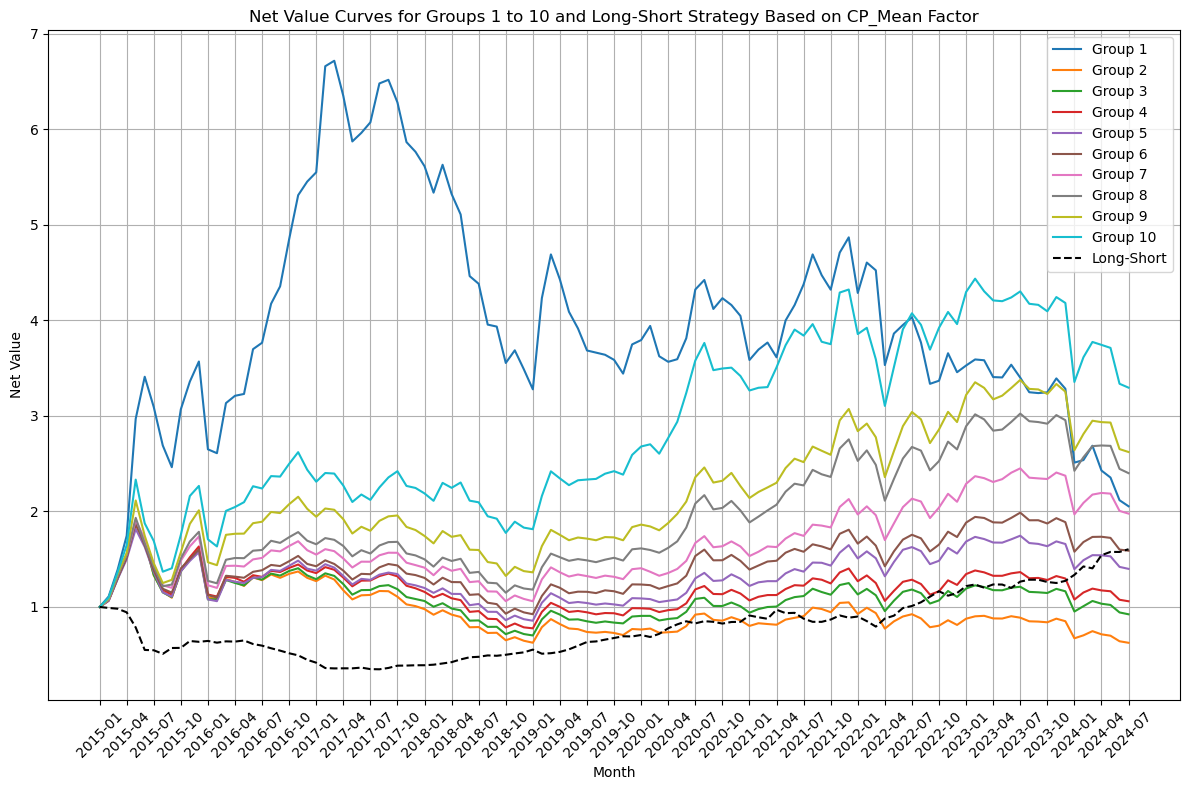

Annual Return: 5.10%
Annual Volatility: 19.39%
Information Ratio: 0.26
Monthly Win Rate: 58.26%
Max Drawdown: -65.26%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17380\1385778258.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  long_short_net_value['Return'] = long_short_net_value['NetValue'].pct_change()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建一个字典用于保存每组的净值
net_values = {i: pd.DataFrame(columns=['Month', 'NetValue']) for i in range(1, 11)}
long_short_net_value = pd.DataFrame(columns=['Month', 'NetValue'])

# 自动分析回测区间的开始和结束日期
df_PT['TradeDay'] = pd.to_datetime(df_PT['TradeDay'])
start_date = df_PT['TradeDay'].min().strftime('%Y-%m')
end_date = df_PT['TradeDay'].max().strftime('%Y-%m')

# 初始化每组的净值为1
initial_net_value = 1
for i in range(1, 11):
    net_values[i] = pd.concat([net_values[i], pd.DataFrame({'Month': [start_date], 'NetValue': [initial_net_value]})])

long_short_net_value = pd.concat([long_short_net_value, pd.DataFrame({'Month': [start_date], 'NetValue': [initial_net_value]})])

# 计算每个月的末日
df_PT['Month'] = df_PT['TradeDay'].dt.to_period('M')
end_of_month = df_PT.groupby('Month')['TradeDay'].max().reset_index()

# 新增logReturn列
df_PT['logReturn'] = np.log(df_PT['Return'] + 1)

# 循环处理每个月的数据
for i in range(len(end_of_month) - 1):
    month_end_day = end_of_month.iloc[i]['TradeDay']
    next_month_end_day = end_of_month.iloc[i + 1]['TradeDay']

    # 获取该月最后一天的所有股票数据
    month_data = df_PT[df_PT['TradeDay'] == month_end_day].copy()
    
    # 对FactorValue_neu进行十分组
    month_data.loc[:, 'FactorValue_rank'] = pd.qcut(month_data['FactorValue_neu'], 10, labels=False) + 1

    returns = {}

    for group in range(1, 11):
        # 选出第x组的股票
        group_stocks = month_data[month_data['FactorValue_rank'] == group]['SecuCode'].values

        # 获取下个月这组股票的数据
        next_month_data = df_PT[(df_PT['TradeDay'] > month_end_day) & (df_PT['TradeDay'] <= next_month_end_day) & 
                                (df_PT['SecuCode'].isin(group_stocks))]

        # 计算每支股票的月收益率
        next_month_log_returns = next_month_data.groupby('SecuCode')['logReturn'].sum()
        next_month_returns = np.exp(next_month_log_returns) - 1

        # 计算第x组股票的平均月收益率
        avg_return = next_month_returns.mean()
        returns[group] = avg_return

        # 计算新的净值
        new_net_value = net_values[group].iloc[-1]['NetValue'] * (1 + avg_return)
        net_values[group] = pd.concat([net_values[group], pd.DataFrame({'Month': [str(next_month_end_day)[:7]], 'NetValue': [new_net_value]})])

    # 计算long-short策略的净值
    long_short_return = (1 + returns[10]) / (1 + returns[1]) - 1
    new_long_short_net_value = long_short_net_value.iloc[-1]['NetValue'] * (1 + long_short_return)
    long_short_net_value = pd.concat([long_short_net_value, pd.DataFrame({'Month': [str(next_month_end_day)[:7]], 'NetValue': [new_long_short_net_value]})])

# 绘制净值曲线
plt.figure(figsize=(12, 8))

for group in range(1, 11):
    plt.plot(net_values[group]['Month'], net_values[group]['NetValue'], linestyle='-', label=f'Group {group}')

plt.plot(long_short_net_value['Month'], long_short_net_value['NetValue'], linestyle='--', color='black', label='Long-Short')

plt.xlabel('Month')
plt.ylabel('Net Value')
plt.title('Net Value Curves for Groups 1 to 10 and Long-Short Strategy Based on CP_Mean Factor')
plt.legend()

# 设置横轴每三个月标注一次
xticks = np.arange(0, len(long_short_net_value), step=3)
xlabels = [long_short_net_value['Month'].iloc[i] for i in xticks]
plt.xticks(ticks=xticks, labels=xlabels, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

# 计算long-short策略的绩效指标
long_short_net_value['Return'] = long_short_net_value['NetValue'].pct_change()

# 年化收益率
annual_return = (long_short_net_value['NetValue'].iloc[-1] / long_short_net_value['NetValue'].iloc[0]) ** (12 / (len(long_short_net_value) - 1)) - 1

# 年化波动率
annual_volatility = long_short_net_value['Return'].std() * np.sqrt(12)

# 信息比率
information_ratio = annual_return / annual_volatility

# 月度胜率
monthly_win_rate = (long_short_net_value['Return'] > 0).mean()

# 最大回撤率
rolling_max = long_short_net_value['NetValue'].cummax()
drawdown = (long_short_net_value['NetValue'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# 打印结果
print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Information Ratio: {information_ratio:.2f}")
print(f"Monthly Win Rate: {monthly_win_rate:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")